In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt

In [3]:
sys.path.append('../')

In [4]:
from models.baseline import Baseline
from models.arima import ARIMA

## Generate data

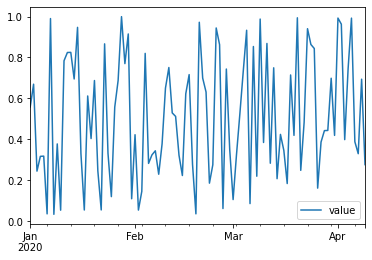

In [5]:
n = 100 
data = np.random.random((n,))
index = pd.date_range('2020-01-01', periods=n)
df = pd.DataFrame({'value': data}, index=index)
df.plot()

## Define forecast horizon and predict

In [6]:
horizon = 10

res_baseline = Baseline(df, n=horizon, column_name='value').predict(df)
res_arima = ARIMA(df, n=horizon, column_name='value').predict(df)

## Plot data

In [7]:
def pred_to_df(pred, index):
    return pd.DataFrame({'pred': pred}, index=index)

In [8]:
pred_index = pd.date_range(index[-1], periods=horizon)
baseline_df = pred_to_df(res_baseline, pred_index)
arima_df = pred_to_df(res_arima, pred_index)

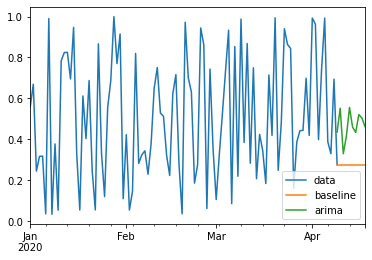

In [9]:
df['value'].plot()
baseline_df['pred'].plot()
arima_df['pred'].plot()

plt.legend(['data', 'baseline', 'arima'])